# CIFAR-Distributed-Backdoor
### Meanshift for Feature Representations after TSNE

In [1]:
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift, AffinityPropagation, estimate_bandwidth


import matplotlib.pyplot as plt

### Constants

In [2]:
class_names = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'
}


In [3]:
model_type_arr = ['Backdoored', 'Clean']
model_type_choice = 0

In [4]:
colors_plotting = ['r', 'b']
colors_plotting_meanshift = ['k', 'y', 'm', 'g']
labels_plotting = ['Translated', 'Training'] 

## Loop to predict number of clusters using Meanshift

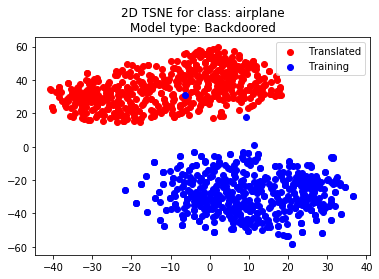

The number of predicted classes is:  2


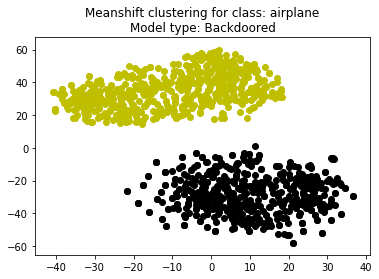

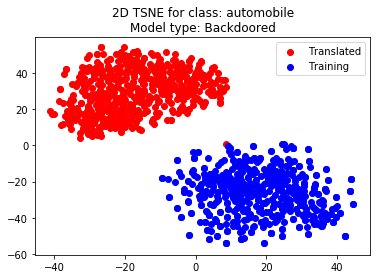

The number of predicted classes is:  2


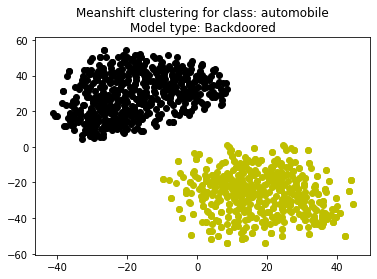

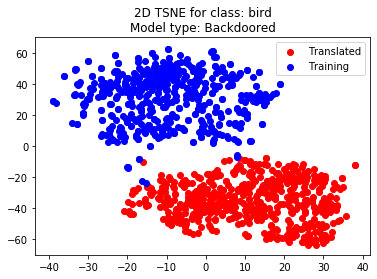

The number of predicted classes is:  2


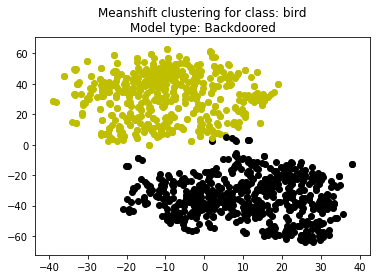

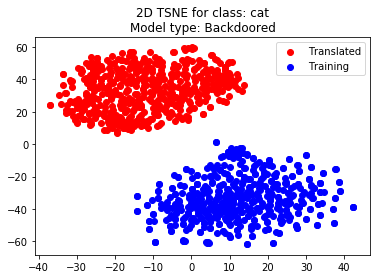

The number of predicted classes is:  2


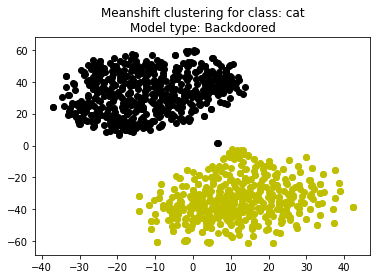

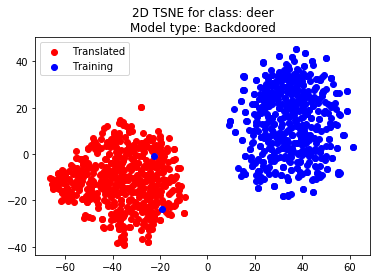

The number of predicted classes is:  2


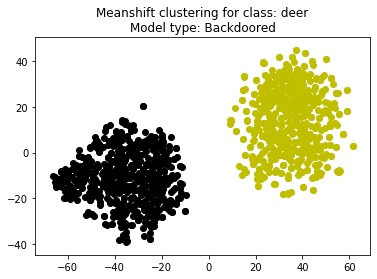

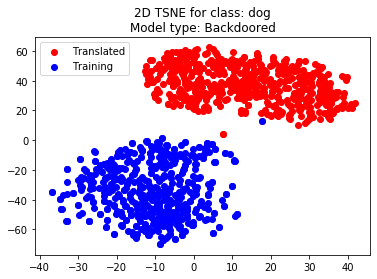

The number of predicted classes is:  2


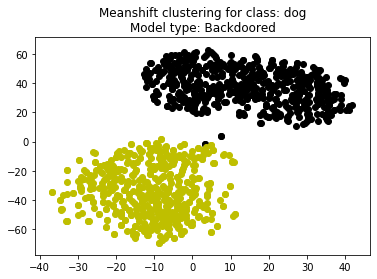

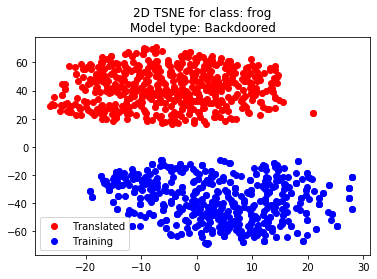

The number of predicted classes is:  2


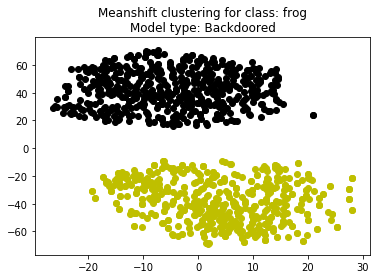

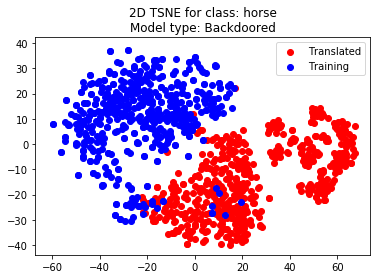

The number of predicted classes is:  4


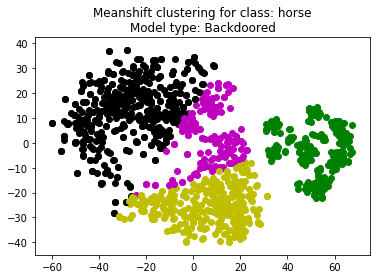

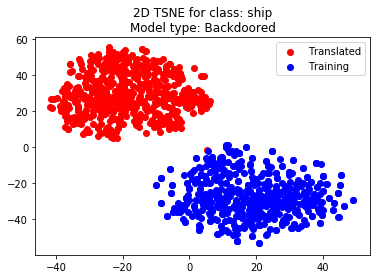

The number of predicted classes is:  2


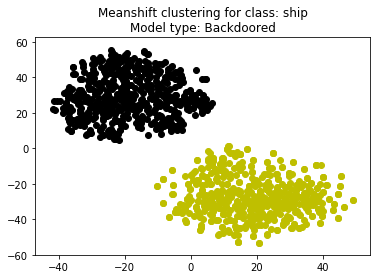

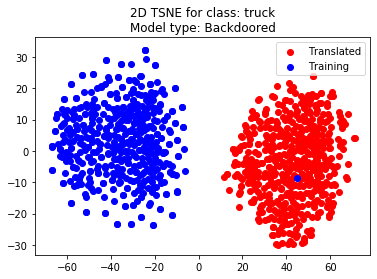

The number of predicted classes is:  2


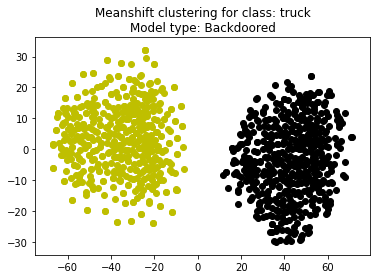

In [5]:
model_type_choice = 0

meanshift = MeanShift(bandwidth = 21)
for targ_lbl in range(10):
    filename = "saved_pickles/2d-tsne-feature-representation/"+ model_type_arr[model_type_choice] +"-Model-Feature-Representations/feature-representations-tsne2d-class-" + str(targ_lbl) + ".pkl"
    with open(filename, 'rb') as handle:
        X_arr_tsne, Y_arr = pickle.load(handle)

    plt.title("2D TSNE for class: " + class_names[targ_lbl] + "\nModel type: "+  model_type_arr[model_type_choice])
    

    X_clean_tsne = []
    Y_clean_tsne = []
    
    X_translated_tsne = [] 
    Y_translated_tsne = []
    
    for X, Y in zip(X_arr_tsne, Y_arr):
        if (Y == 0):
            X_translated_tsne.append(X)
            Y_translated_tsne.append(Y)
        
        if(Y == 1):
            X_clean_tsne.append(X)
            Y_clean_tsne.append(Y)
            
   
    plt.scatter(*zip(*X_translated_tsne), c = colors_plotting[Y_translated_tsne[0]], label=labels_plotting[Y_translated_tsne[0]])
    plt.scatter(*zip(*X_clean_tsne), c = colors_plotting[Y_clean_tsne[0]], label=labels_plotting[Y_clean_tsne[0]])

    plt.legend()
    plt.show()
    plt.close()

    plt.title("Meanshift clustering for class: " + class_names[targ_lbl] + "\nModel type: "+  model_type_arr[model_type_choice])
    X_arr_tsne_meanshift = meanshift.fit(X_arr_tsne)
    
    print("The number of predicted classes is: ", len(set(X_arr_tsne_meanshift.labels_)))

    for X, Y in zip(X_arr_tsne, X_arr_tsne_meanshift.labels_):
        plt.scatter(X[0], X[1], c = colors_plotting_meanshift[Y])
    plt.show()
    plt.close()

    